### Exploring the files with Pandas
Many statistical Python packages can deal with numpy Arrays.

Numpy Arrays however are not always easy to use. 

Pandas is a package that provides a dataframe interface, similar to what R uses as the main data structure.
Since Pandas has become so popular, many packages accept both pd.DataFrames and numpy Arrays.

In [1]:
import os
from dotenv import load_dotenv, find_dotenv

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

### First some environment variables
We now use the files that are stored in the RAW directory.

If we decide to change the data format by changing names, adding features, created summary data frames etc., we will save those files in the INTERIM directory.

In [2]:
PROJECT_DIR = os.path.dirname(dotenv_path)
RAW_DATA_DIR = PROJECT_DIR + os.environ.get("RAW_DATA_DIR")
INTERIM_DATA_DIR = PROJECT_DIR + os.environ.get("INTERIM_DATA_DIR")
files=os.environ.get("FILES").split()

print("Project directory is  : {0}".format(PROJECT_DIR))
print("Raw data directory is : {0}".format(RAW_DATA_DIR))
print("Interim directory is  : {0}".format(INTERIM_DATA_DIR))

Project directory is  : /home/gsentveld/lunch_and_learn
Raw data directory is : /home/gsentveld/lunch_and_learn/data/raw
Interim directory is  : /home/gsentveld/lunch_and_learn/data/interim


### Importing pandas and matplotlib.pyplot

In [3]:
# The following jupyter notebook magic makes the plots appear in the notebook. 
# If you run in batch mode, you have to save your plots as images.
%matplotlib inline

# matplotlib.pyplot is traditionally imported as plt
import matplotlib.pyplot as plt

# Pandas is traditionaly imported as pd.
import pandas as pd
from pylab import rcParams

# some display options to size the figures. feel free to experiment
pd.set_option('display.max_columns', 25)
rcParams['figure.figsize'] = (17, 7)

### Reading a file in Pandas
Reading a CSV file is really easy in Pandas. There are several formats that Pandas can deal with.

|Format Type|Data Description|Reader|Writer|
|---|---|---|---|
|text|CSV|read_csv|to_csv|
|text|JSON|read_json|to_json|
|text|HTML|read_html|to_html|
|text|Local clipboard|read_clipboard|to_clipboard|
|binary|MS Excel|read_excel|to_excel|
|binary|HDF5 Format|read_hdf|to_hdf|
|binary|Feather Format|read_feather|to_feather|
|binary|Msgpack|read_msgpack|to_msgpack|
|binary|Stata|read_stata|to_stata|
|binary|SAS|read_sas ||
|binary|Python Pickle Format|read_pickle|to_pickle|
|SQL|SQL|read_sql|to_sql|
|SQL|Google Big Query|read_gbq|to_gbq|

We will use <code>pd.read_csv()</code>.

As you will see, the Jupyter notebook prints out a very nice rendition of the DataFrame object that is the result

In [4]:

#family=pd.read_csv(RAW_DATA_DIR+'/familyxx.csv')
#persons=pd.read_csv(RAW_DATA_DIR+'/personsx.csv')
samadult=pd.read_csv(RAW_DATA_DIR+'/samadult.csv')

In [5]:

samadult.columns.values.tolist()

['FPX',
 'FMX',
 'HHX',
 'INTV_QRT',
 'WTIA_SA',
 'WTFA_SA',
 'SEX',
 'HISPAN_I',
 'R_MARITL',
 'MRACRPI2',
 'RACERPI2',
 'MRACBPI2',
 'AGE_P',
 'RECTYPE',
 'SRVY_YR',
 'INTV_MON',
 'REGION',
 'STRAT_P',
 'PSU_P',
 'PAR_STAT',
 'FDRN_FLG',
 'PROX1',
 'PROX2',
 'LATEINTA',
 'PROXYSA',
 'DIFAGE2',
 'HYPEV',
 'HYPDIFV',
 'HYPMDEV2',
 'HYPMED2',
 'CHLEV',
 'CHLYR',
 'CHLMDEV2',
 'CHLMDNW2',
 'CHDEV',
 'ANGEV',
 'MIEV',
 'HRTEV',
 'STREV',
 'EPHEV',
 'COPDEV',
 'ASPMEDEV',
 'ASPMEDAD',
 'ASPMDMED',
 'ASPONOWN',
 'AASMEV',
 'AASSTILL',
 'AASMYR',
 'AASERYR1',
 'ULCEV',
 'ULCYR',
 'ULCCOLEV',
 'CANEV',
 'CNKIND1',
 'CNKIND2',
 'CNKIND3',
 'CNKIND4',
 'CNKIND5',
 'CNKIND6',
 'CNKIND7',
 'CNKIND8',
 'CNKIND9',
 'CNKIND10',
 'CNKIND11',
 'CNKIND12',
 'CNKIND13',
 'CNKIND14',
 'CNKIND15',
 'CNKIND16',
 'CNKIND17',
 'CNKIND18',
 'CNKIND19',
 'CNKIND20',
 'CNKIND21',
 'CNKIND22',
 'CNKIND23',
 'CNKIND24',
 'CNKIND25',
 'CNKIND26',
 'CNKIND27',
 'CNKIND28',
 'CNKIND29',
 'CNKIND30',
 'CNKIND31',
 'D

In [6]:
features=[x for x in samadult.columns.values.tolist() if x.startswith('ALDURA')]

In [7]:
import numpy as np

np.sum(samadult.WKDAYR.notnull() & (samadult['WKDAYR']<900))

21385

In [8]:
np.sum(samadult.ALDURA17.notnull() & (samadult['ALDURA17']<90)   )

825

In [9]:
features=[
 'ALDURA3',
 #'ALDURA4',
 #'ALDURA6',
 #'ALDURA7',
 #'ALDURA8',
 'ALDURA11',
 #'ALDURA17',
 #'ALDURA20',
 #'ALDURA21',
 #'ALDURA22',
 #'ALDURA23',
 #'ALDURA24',
 #'ALDURA27',
 #'ALDURA28',
 'ALDURA29',
 'ALDURA33']

In [10]:
target='ALDURA17'
ADD_INDICATORS=False
ADD_POLYNOMIALS=True
LOG_X=True
LOG_Y=False

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

np.random.seed(42)

reg=LinearRegression()

data=samadult[samadult.ALDURA17.notnull() & (samadult['ALDURA17']<90)]

X=data[features]
X.shape

(825, 4)

In [12]:
# turn years since into the "nth" year of 
# then fill with 0 otherwise
X=X+1
X=X.fillna(0)

if LOG_X:
    X=np.log1p(X)

if ADD_INDICATORS:
    indicator_names=[x+"_I" for x in features]

    indicators=pd.DataFrame()
    for feature in features:
        indicators[feature+"_I"]=data[feature].notnull().astype(int)

    X=pd.concat([X, indicators], axis=1, join_axes=[X.index])

In [13]:
from sklearn.preprocessing import PolynomialFeatures

if ADD_POLYNOMIALS:
    poly=PolynomialFeatures(degree=2, interaction_only=True)
    X=poly.fit_transform(X)


In [14]:
X.shape

(825, 11)

In [15]:
y=data[target]
y=y+1
y=y.fillna(0)

if LOG_Y:
    y=np.log1p(y)

In [16]:
y.head()

14     10.0
25     51.0
58     31.0
63     21.0
116    31.0
Name: ALDURA17, dtype: float64

In [17]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
y_pred=reg.predict(X)

score=r2_score(y, y_pred)

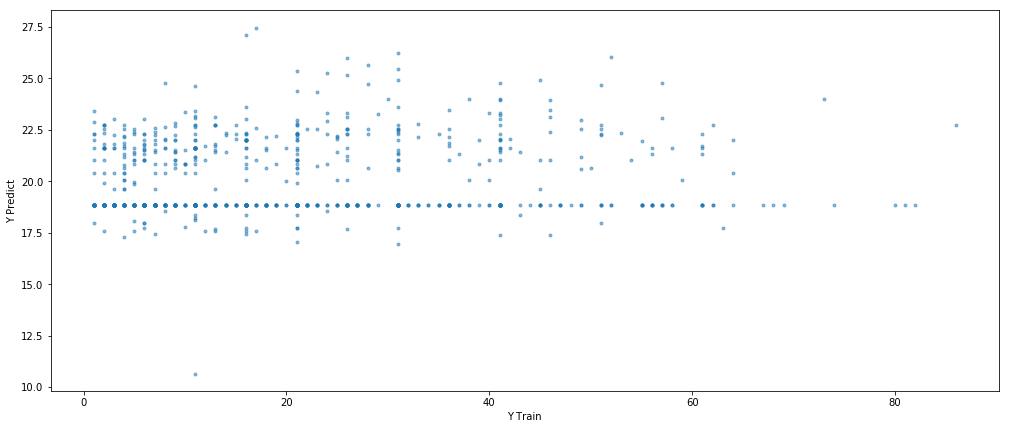

In [19]:
import matplotlib.pyplot as plt
plt.plot(y,y_pred,marker='.', linestyle='None', alpha=0.5 )
plt.xlabel('Y Train')
plt.ylabel('Y Predict')
plt.show()

In [20]:
score

0.012047795016131291

In [21]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=0.7, normalize=True)
ridge.fit(X,y)

Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [22]:
y_pred=ridge.predict(X)

In [23]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

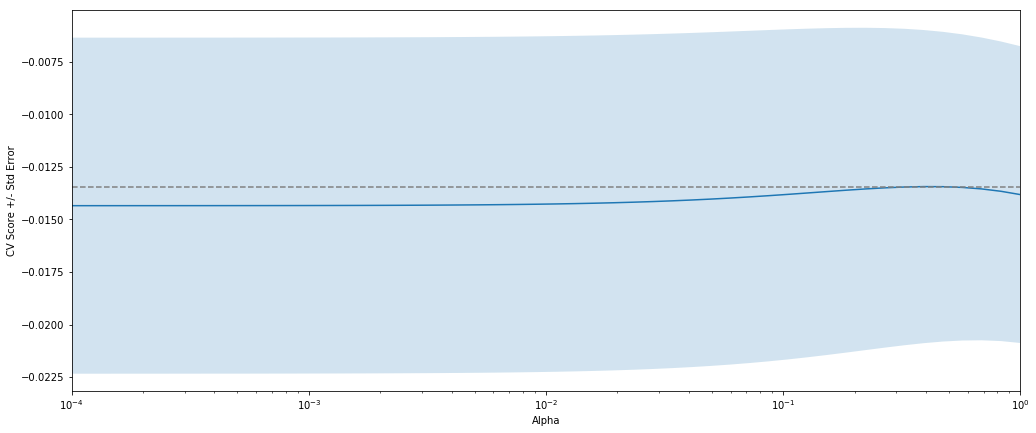

In [24]:
# Import necessary modules
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


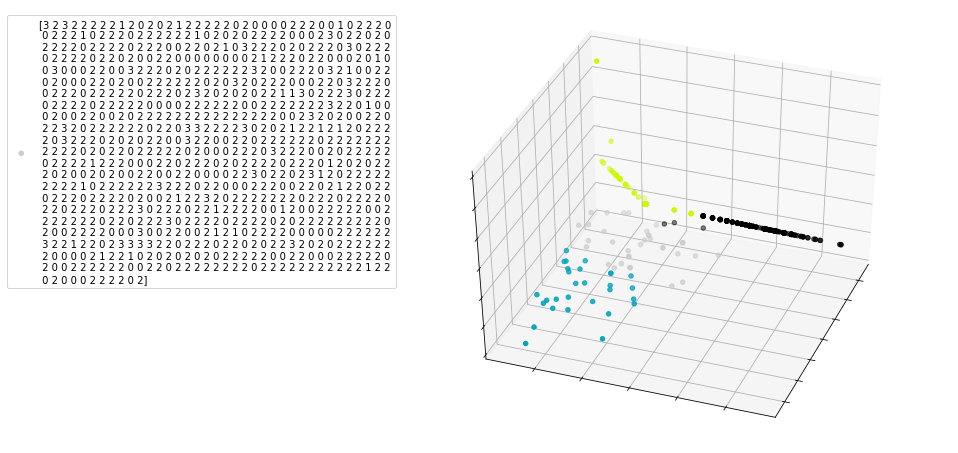

In [25]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


fig = plt.figure(4, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=40, azim=20)

plt.cla()
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

kmean=KMeans(n_clusters=4)
kmean.fit(X_pca)
y_lab=kmean.labels_


# Reorder the labels to have colors matching the cluster results
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], label=y_lab,c=y_lab+1, cmap=plt.cm.spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.legend(bbox_to_anchor=(0, 1), loc='upper right', ncol=7)

plt.show()

In [26]:
y_lab

array([3, 2, 3, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 3, 0,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 1, 0, 3, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 3, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2,
       0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 3, 0, 0, 0, 2, 2, 0, 0, 3, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 0, 0, 2, 2, 2, 0, 3, 2, 1, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 3, 2,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 3, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 3, 0, 2, 2,
       2, 3, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 1, 0, 0, 0, 2, 0,
       0, 2,

In [27]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca2 = pca.transform(X)


kmean=KMeans(n_clusters=4)
kmean.fit(X_pca2)
y_lab2=kmean.labels_

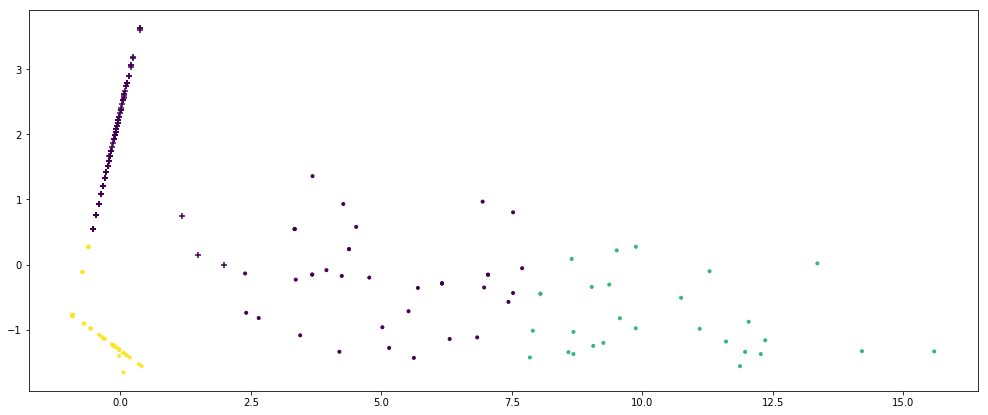

In [28]:
#plt.cla()
#plt.figure()

markers=[',',]

case=1

x_special=X_pca2[y_lab2==case]
c_special=y_lab2[y_lab2==case]
x_other=X_pca2[y_lab2!=case]
c_other=y_lab2[y_lab2!=case]

plt.scatter(x_special[:,0],x_special[:,1], c=c_special, marker='+')
plt.scatter(x_other[:,0],x_other[:,1], c=c_other, marker='.')
plt.show()

In [29]:
y_lab2[:5]

array([0, 3, 0, 3, 3], dtype=int32)

In [30]:
for i in range(0,4):
    y_case=y[y_lab2==i]
    lab_mean=np.mean(y_case)
    lab_std=np.std(y_case)
    lab_perc=np.percentile(y_case, [2.5, 97.5])
    print("For case {}, the mean is {} and the std = {} and the 95% confidence interval = {}".format(i,lab_mean, lab_std, lab_perc))

For case 0, the mean is 20.43243243243243 and the std = 18.205346022885752 and the 95% confidence interval = [  1.9  57.4]
For case 1, the mean is 20.97983870967742 and the std = 16.63106537350679 and the 95% confidence interval = [  1.175  61.   ]
For case 2, the mean is 24.357142857142858 and the std = 12.361270986761973 and the 95% confidence interval = [  7.675  51.325]
For case 3, the mean is 19.341796875 and the std = 16.382702479177244 and the 95% confidence interval = [  1.  61.]


[Back to Agenda](http://localhost:8000/notebooks/Lunch_And_Learn_Session_2_Index.slides.html)